In [1]:
import dlib
import cv2
import numpy as np
from PIL import Image
import sys
import os
import pyocr
import pyocr.builders

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16,12

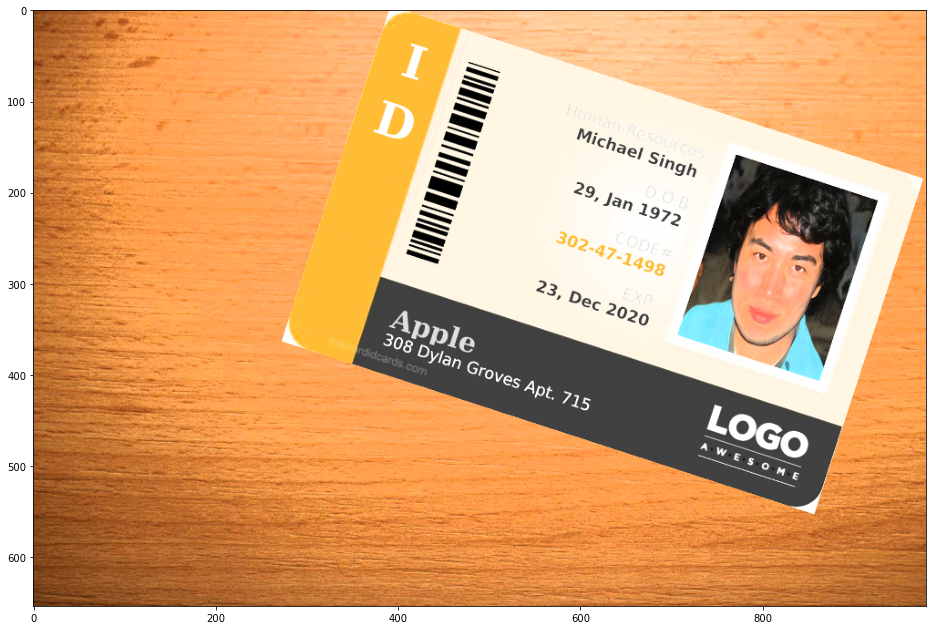

In [77]:
image = cv2.imread(os.path.join('.', "dataset", "validation", 'image_30.png'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image[int(image.shape[0]*0.01):int(image.shape[0]*0.99), int(image.shape[1]*0.01):int(image.shape[1]*0.99)]
plt.imshow(image)

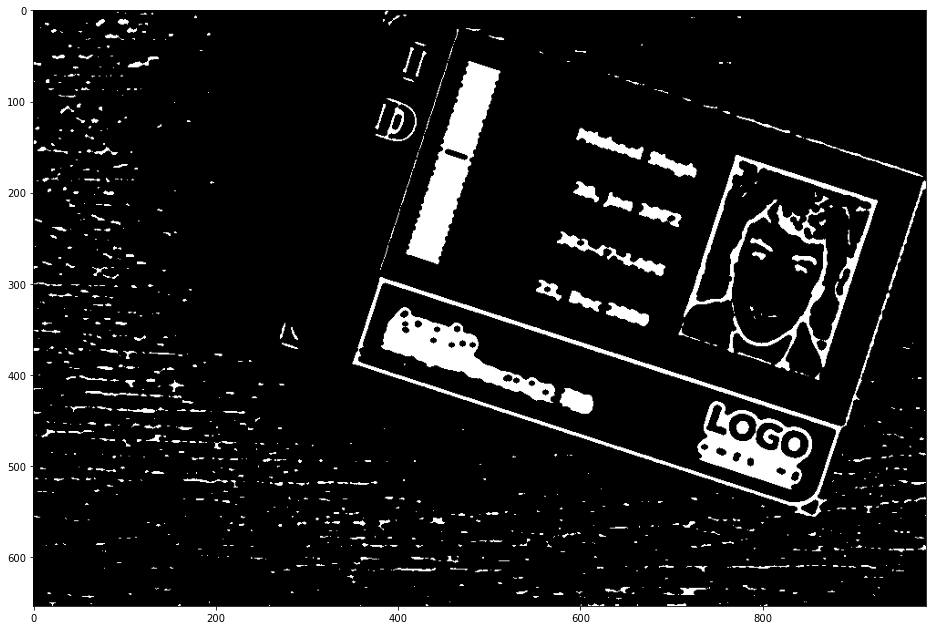

In [78]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = 255 - cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 7)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7)))
plt.imshow(closing, 'gray')

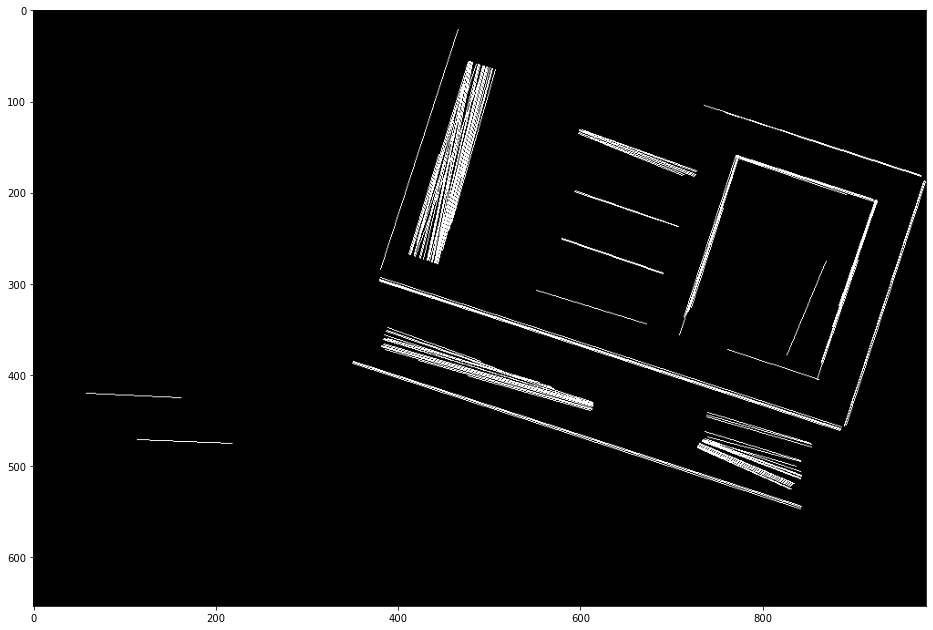

In [79]:
lines = cv2.HoughLinesP(closing, rho=1, theta=3.14/180, threshold=80, minLineLength=100, maxLineGap=10)
houghspace = np.zeros(closing.shape).astype(np.uint8)
for line in lines:
    houghspace = cv2.line(houghspace, (line[0][0], line[0][1]), (line[0][2], line[0][3]), color=255, thickness=1)
plt.imshow(houghspace, 'gray')

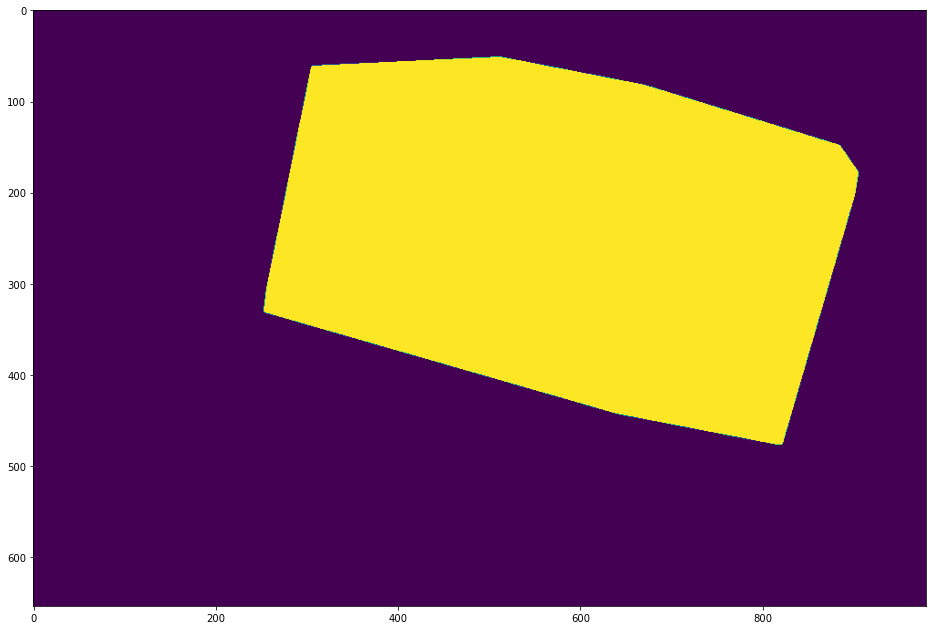

In [75]:
#_, contours, _ = cv2.findContours(houghspace, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#temphull = []
#for cnt in contours:
#    temphull.extend(cv2.convexHull(cnt, False))
points = []
for line in lines:
    points.append([line[0][0], line[0][1]])
    points.append([line[0][2], line[0][3]])
hull = cv2.convexHull(np.array(points), False)
#print(hull)
hscp = np.zeros(closing.shape).astype(np.uint8)
#hscp = cv2.drawContours(hscp, hull, -1, 255, cv2.FILLED)
cv2.fillPoly(hscp, pts =[hull], color=255)
plt.imshow(hscp)

-73.95662689208984


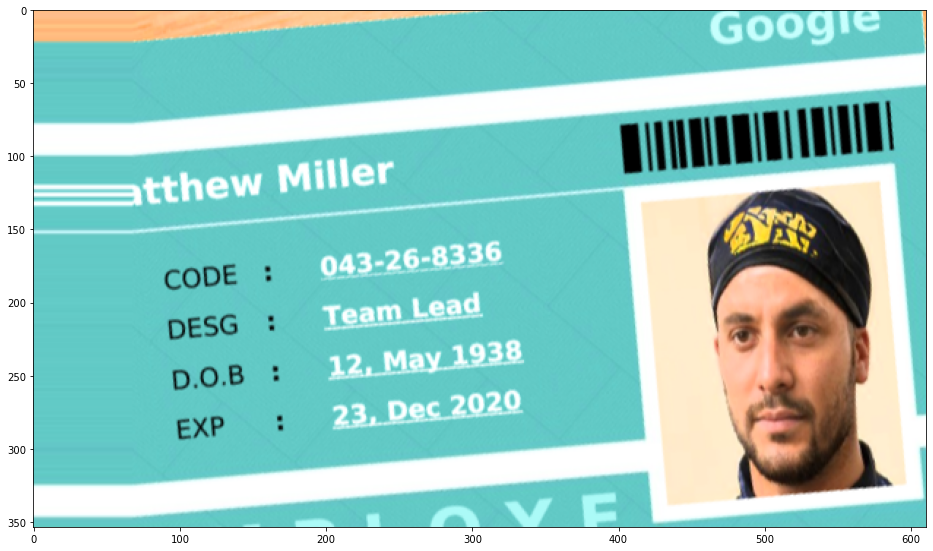

In [76]:
center, size, angle = cv2.minAreaRect(hull)
print(angle)
center, size = tuple(map(int, center)), tuple(map(int, size))
height, width = image.shape[0], image.shape[1]
M = cv2.getRotationMatrix2D(center, angle, 1)
img_rot = cv2.warpAffine(image, M, (width, height))
img_crop = cv2.getRectSubPix(img_rot, size, center)
idcrgb = cv2.rotate(img_crop, cv2.ROTATE_90_COUNTERCLOCKWISE) if angle <= -45 else img_crop
plt.figure()
plt.imshow(idcrgb)